# Exercises in Clustering

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

# 1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

In [23]:
X = pd.read_csv('data\\Ch5_bike_station_locations.csv')
X

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620
...,...,...
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034


In [24]:
minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [25]:
kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(X_scaled_mm)

c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

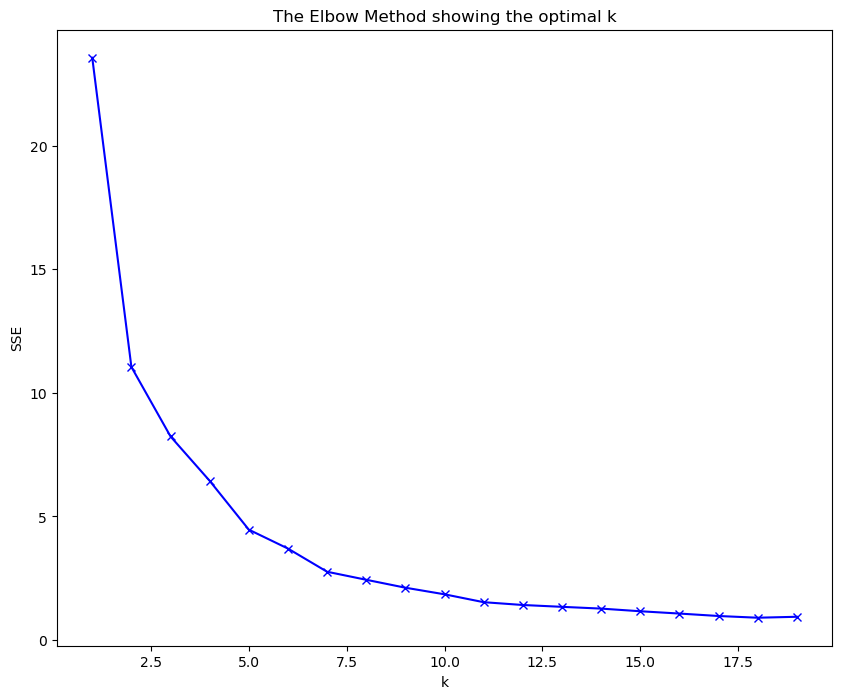

In [26]:
errors = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled_mm)
    errors.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 12.51239915168923
K=3: 2.8126186207555417
K=4: 1.7959238418381247
K=5: 1.9750403224605462
K=6: 0.7656412067262663
K=7: 0.9378981066234551
K=8: 0.3244590668381244
K=9: 0.32089259823933336
K=10: 0.2672160598542297
K=11: 0.3189298464662407
K=12: 0.1133713738503348
K=13: 0.07437275015880851
K=14: 0.07145167576950939
K=15: 0.10730619175542588
K=16: 0.09330361665581166
K=17: 0.0989775834841794
K=18: 0.06960681648554812
K=19: -0.038152233888333


# 2. Visualize the K-Means clustering result for the best K.


c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


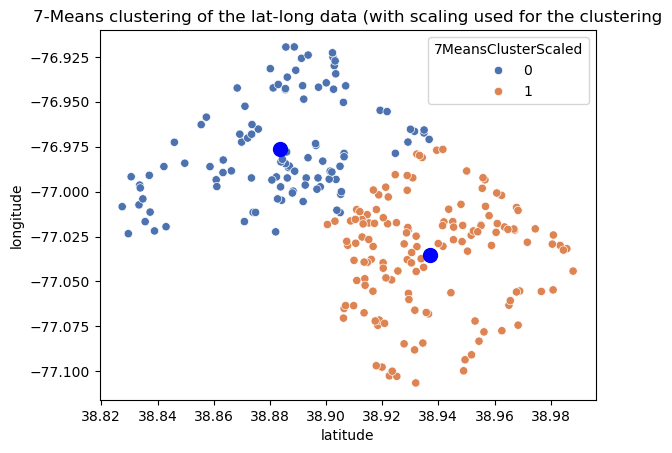

In [31]:
kmeans_scaled7 = KMeans(n_clusters=2)
kmeans_scaled7.fit(X_scaled_mm)

X["7MeansClusterScaled"] = kmeans_scaled7.labels_
centroids7 = minMaxScaler.inverse_transform(kmeans_scaled7.cluster_centers_)

sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "7MeansClusterScaled", palette="deep")
plt.scatter(x = centroids7[:,0], y = centroids7[:,1], color='blue', s = 100)
plt.title("7-Means clustering of the lat-long data (with scaling used for the clustering")
plt.show()

# 3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.


In [35]:
X = pd.read_csv('data\\Ch5_bike_station_locations.csv')
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [52]:
def aggClustering(n, link):
    agg = AgglomerativeClustering(n_clusters=n, linkage=link)
    agg.fit(X_scaled_mm)

    X["aggCluster{0}".format(n)] = agg.labels_

    plt.figure(figsize=(8, 6))

    sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "aggCluster{0}".format(n), palette="deep")
    plt.title(f'Agglomative clustering of bike  data with {n} clusters and of type {link}')
    plt.show()

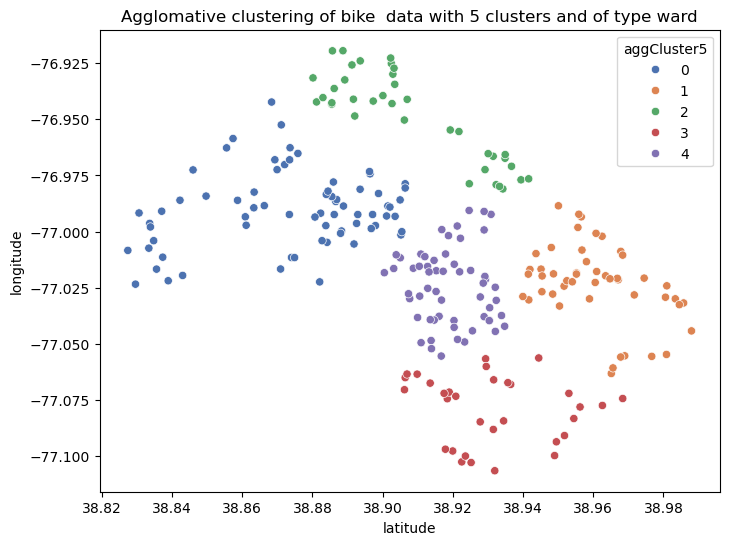

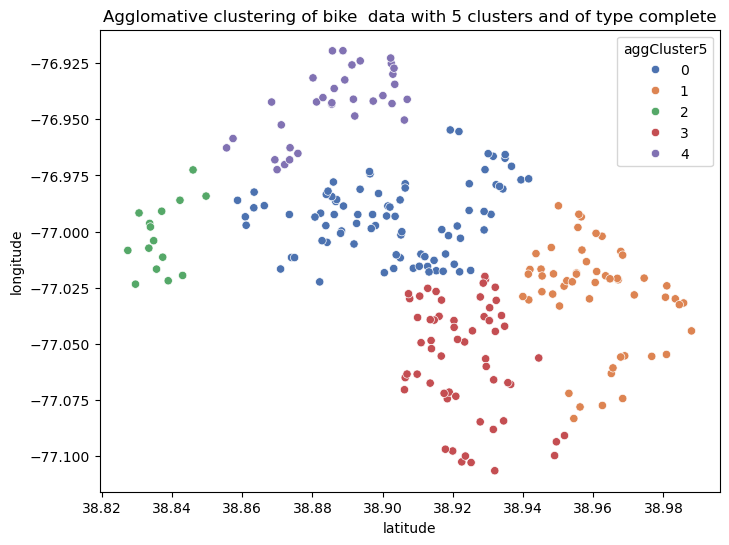

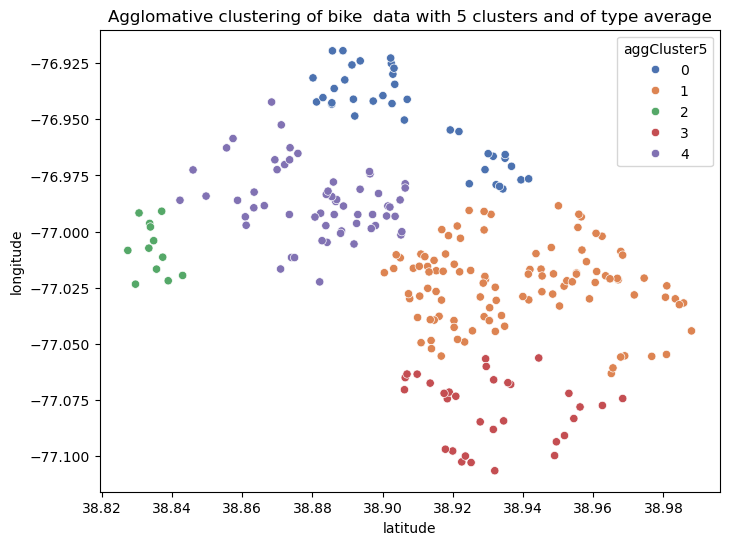

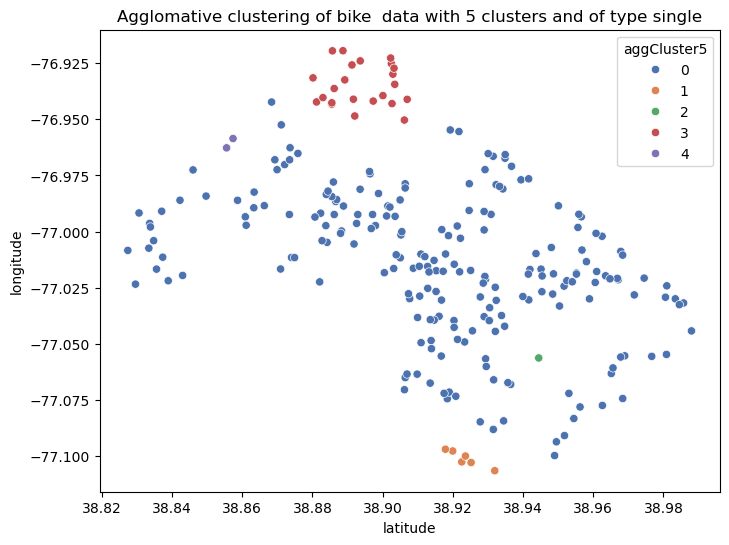

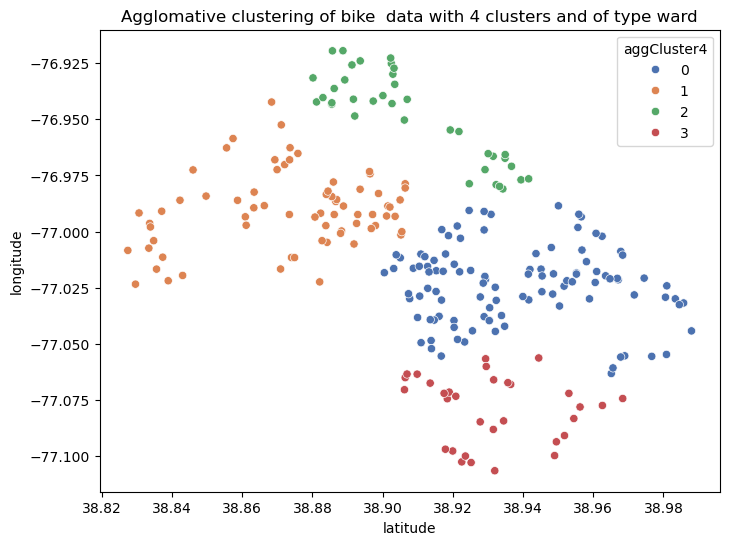

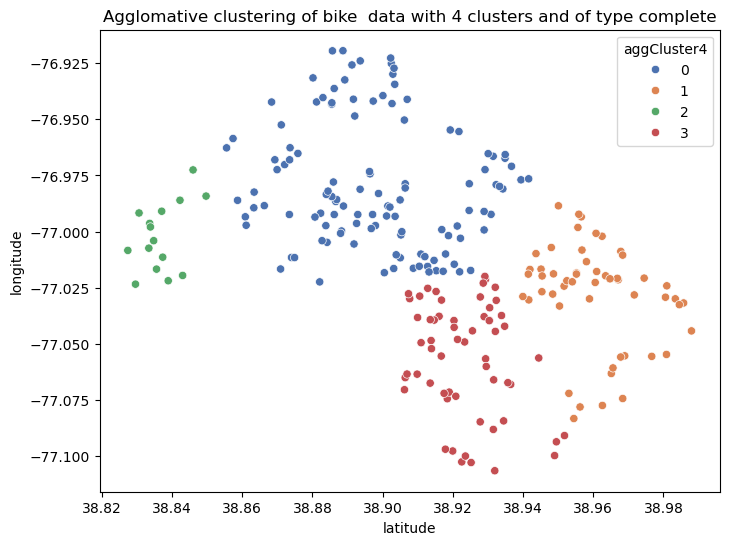

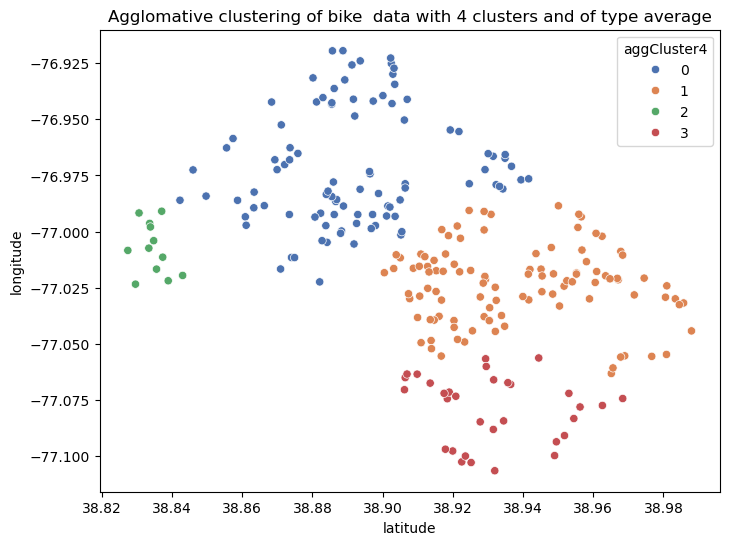

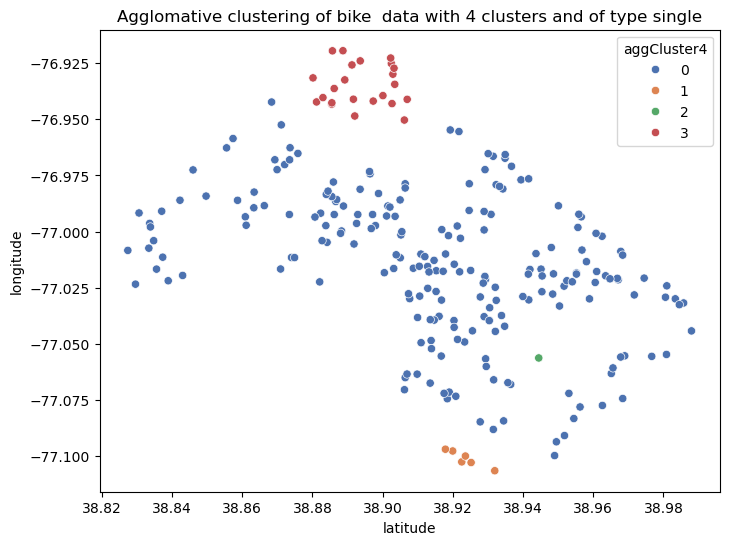

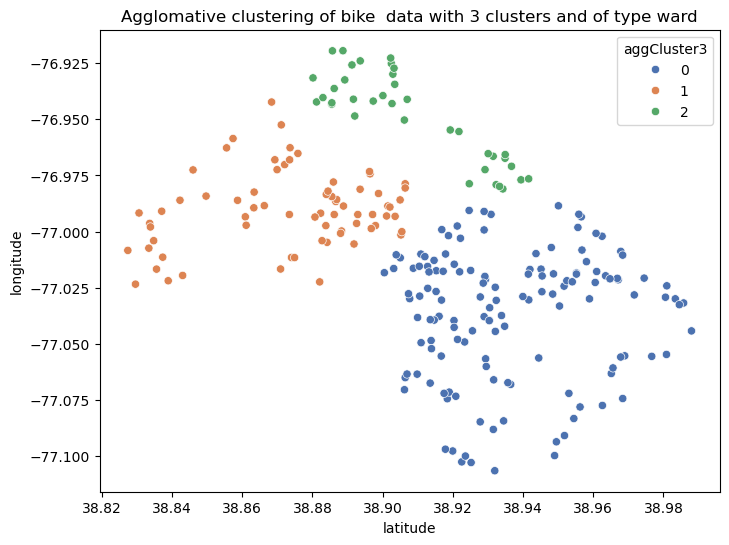

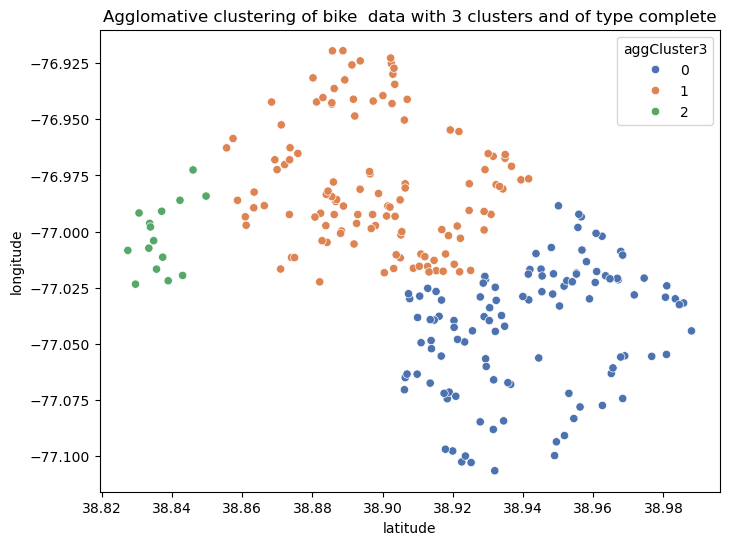

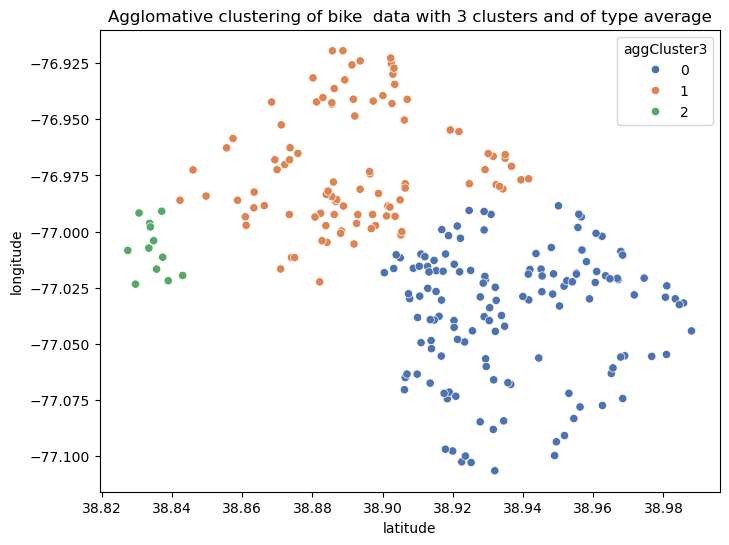

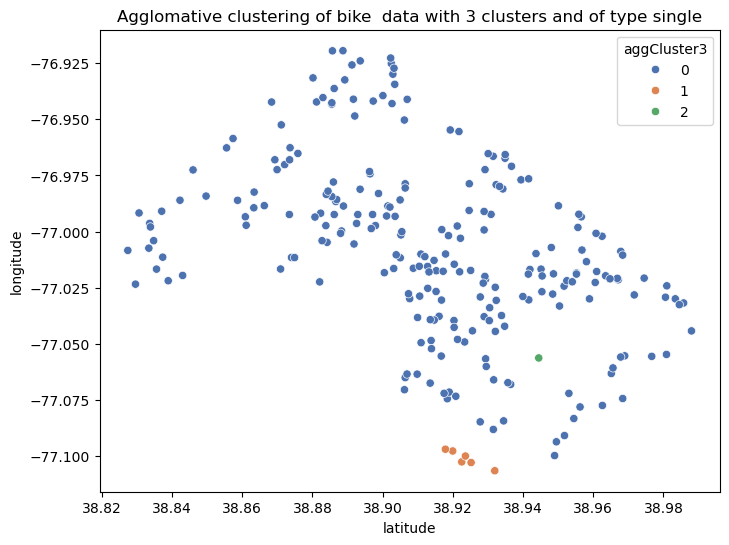

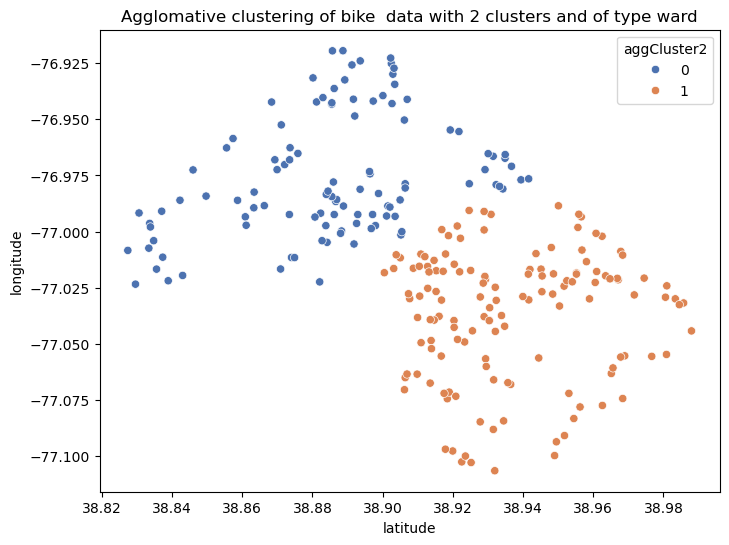

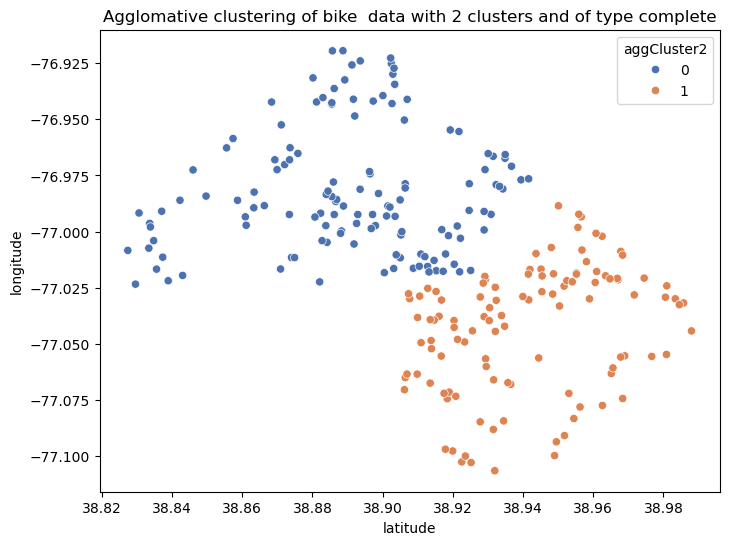

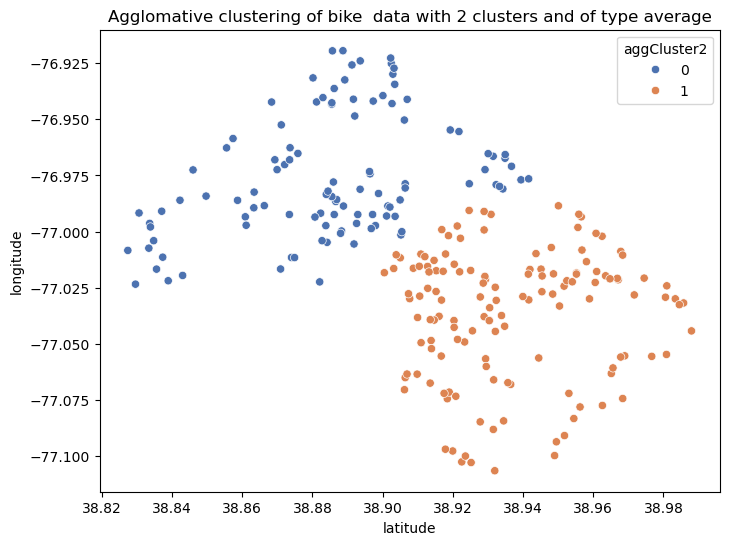

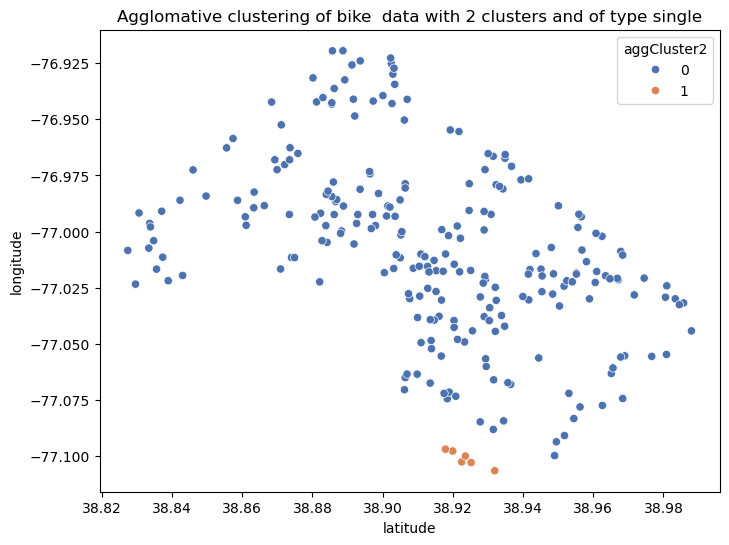

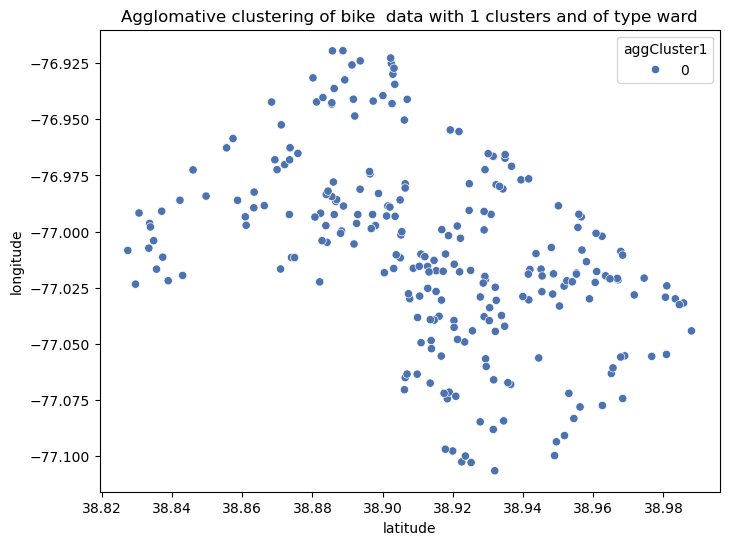

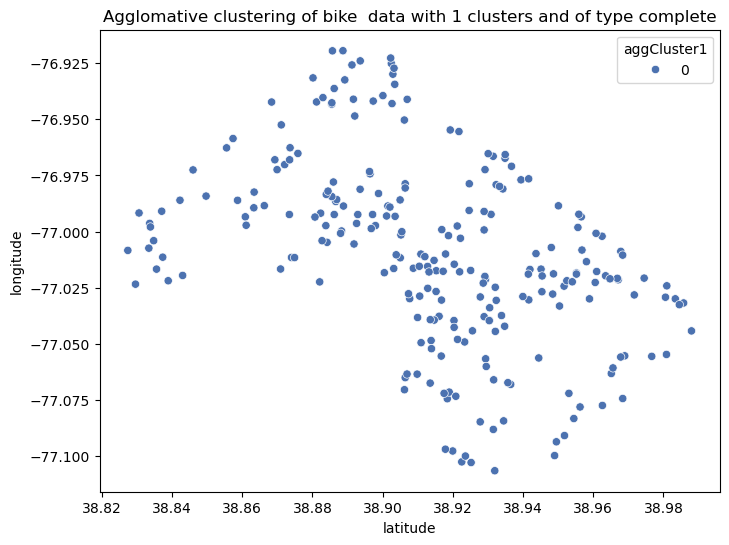

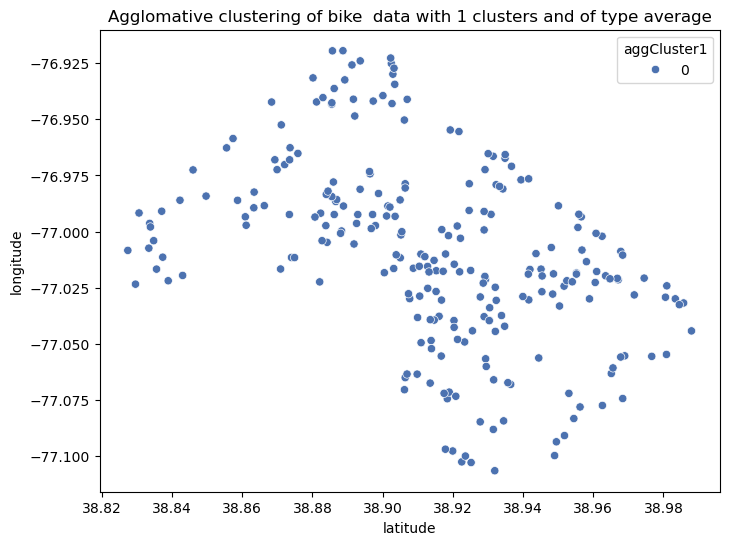

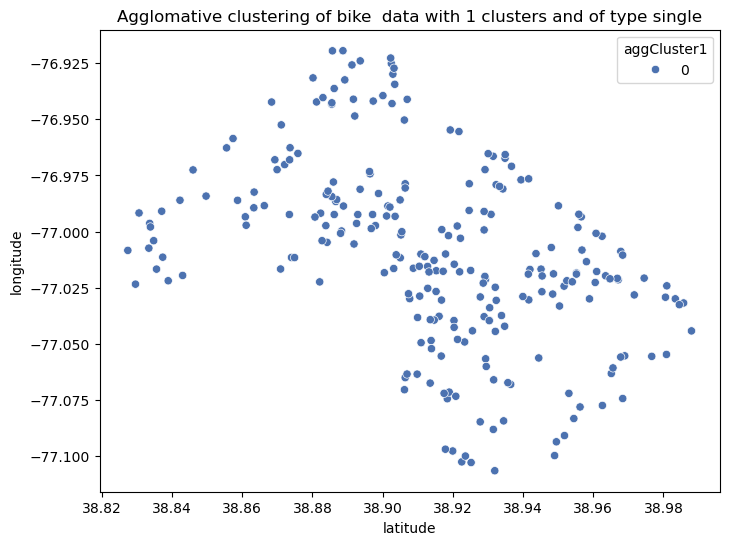

In [53]:
for cn in range(5, 0, -1):
    aggClustering(cn, 'ward')
    aggClustering(cn, 'complete')
    aggClustering(cn, 'average')
    aggClustering(cn, 'single')



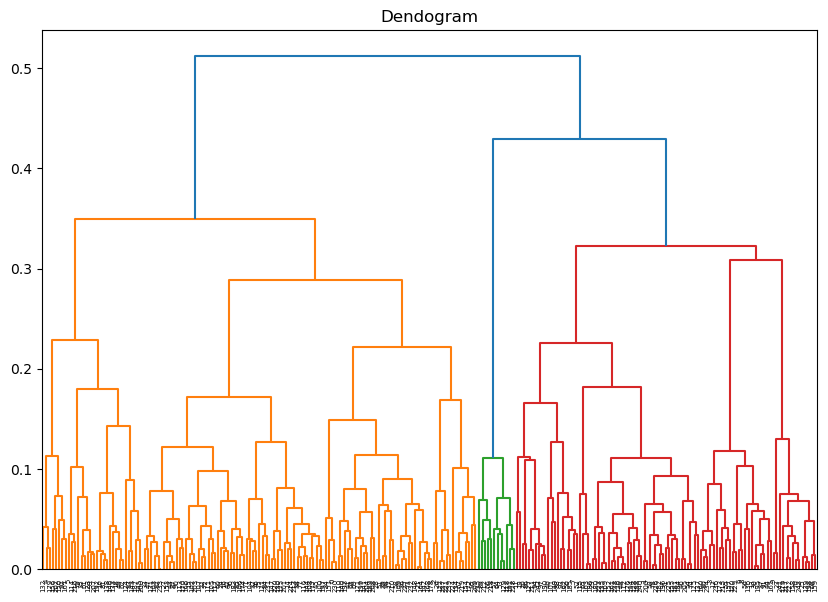

In [58]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendogram")

dend = shc.dendrogram(shc.linkage(X_scaled_mm, method='average'))
plt.show()